In [43]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [44]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 30','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34','column 35','column 36','column 37','column 38','column 39','column 40','column 41','column 42','column 43','column 44','column 45','column 46','column 47','column 48','column 49','column 50','column 51','column 52','column 53','column 54','column 55','column 56','column 57','column 58','column 59','column 60']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Sonar\Sonar_NW_10.xlsx.', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 51,column 52,column 53,column 54,column 55,column 56,column 57,column 58,column 59,column 60
0,0.0200,0.0371,0.0428,0.0207,0.0954,NaN,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,NaN,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,NaN,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,NaN,0.0316,0.0164,0.0095,0.0078
3,NaN,NaN,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,NaN,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,NaN,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,NaN,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,NaN,0.1694,0.2328,NaN,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,NaN,NaN
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,NaN,0.0062,0.0067
205,NaN,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,NaN,0.0077,0.0031
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0042,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,NaN,0.0036,0.0048


In [45]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	40
float64		column 2	20
float64		column 3	20
float64		column 4	20
float64		column 5	20
float64		column 6	40
float64		column 7	20
float64		column 8	40
float64		column 9	0
float64		column 10	40
float64		column 11	0
float64		column 12	0
float64		column 13	20
float64		column 14	20
float64		column 15	20
float64		column 16	0
float64		column 17	20
float64		column 18	40
float64		column 19	40
float64		column 20	40
float64		column 21	20
float64		column 22	0
float64		column 23	40
float64		column 30	20
float64		column 25	20
float64		column 26	0
float64		column 27	0
float64		column 28	0
float64		column 29	40
float64		column 30	20
float64		column 31	0
float64		column 32	20
float64		column 33	0
float64		column 34	20
float64		column 35	40
float64		column 36	40
float64		column 37	20
float64		column 38	20
float64		column 39	20
float64		column 40	20
float64		column 41	20
float64		column 42	0
float64		column 43	20
float64		column 44	20
float64		colum

In [46]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 51,column 52,column 53,column 54,column 55,column 56,column 57,column 58,column 59,column 60
count,168.000000,188.000000,188.000000,188.000000,188.000000,168.000000,188.000000,168.000000,208.000000,168.000000,...,188.000000,188.000000,208.000000,188.000000,208.000000,168.000000,188.000000,168.000000,188.000000,188.000000
mean,0.030088,0.037219,0.043277,0.053064,0.074440,0.102272,0.118618,0.130239,0.178003,0.196732,...,0.016647,0.013188,0.010709,0.011039,0.009290,0.008109,0.007540,0.007733,0.007760,0.006385
std,0.022909,0.031164,0.037862,0.043322,0.055710,0.053122,0.057710,0.076725,0.118387,0.120393,...,0.012038,0.009341,0.007060,0.007302,0.007088,0.005399,0.005436,0.005752,0.005727,0.005078
min,0.001500,0.001700,0.001500,0.006100,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000900,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000800,0.000100,0.000600
25%,0.016375,0.017050,0.019675,0.025525,0.038475,0.067025,0.080900,0.085950,0.097025,0.110600,...,0.009100,0.007675,0.005075,0.005575,0.004150,0.004575,0.003700,0.003675,0.003925,0.003100
50%,0.023850,0.030850,0.034150,0.044500,0.062500,0.092800,0.105500,0.113200,0.152250,0.182400,...,0.014750,0.011550,0.009550,0.009550,0.007500,0.007050,0.005800,0.006150,0.006550,0.005300
75%,0.036525,0.045850,0.055350,0.062850,0.096650,0.128500,0.147075,0.165575,0.233425,0.253425,...,0.020925,0.016325,0.014900,0.014250,0.012100,0.010125,0.010100,0.010100,0.009800,0.007900
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.307000,0.332200,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.037700,0.033200,0.043900


<AxesSubplot:>

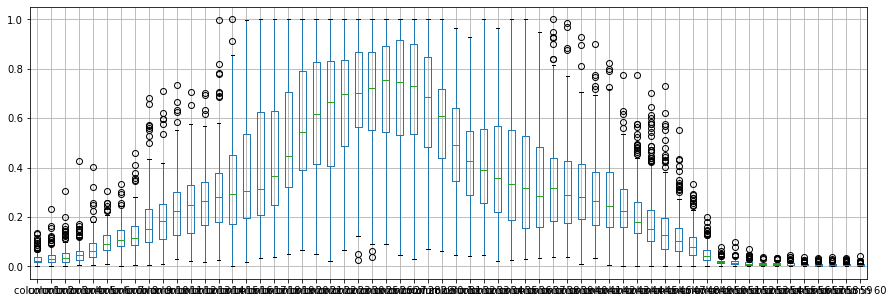

In [47]:
df.boxplot(return_type='axes', figsize=(15,5))

In [48]:
df.mean()

column 1       0.030088
column 2       0.037219
column 3       0.043277
column 4       0.053064
column 5       0.074440
column 6       0.102272
column 7       0.118618
column 8       0.130239
column 9       0.178003
column 10      0.196732
column 11      0.236013
column 12      0.250221
column 13      0.270255
column 14      0.297211
column 15      0.322638
column 16      0.378487
column 17      0.414448
column 18      0.436639
column 19      0.506582
column 20      0.561504
column 21      0.615221
column 22      0.624275
column 23      0.657413
column 30      0.683589
column 25      0.682820
column 26      0.699866
column 27      0.702155
column 28      0.694024
column 29      0.656057
column 30.1    0.584755
column 31      0.504475
column 32      0.428726
column 33      0.417220
column 34      0.400865
column 35      0.384684
column 36      0.371827
column 37      0.353064
column 38      0.339639
column 39      0.326477
column 40      0.308604
column 41      0.293056
column 42      0

In [49]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 51,column 52,column 53,column 54,column 55,column 56,column 57,column 58,column 59,column 60
column 1,1.000000,0.677302,0.601927,0.497876,0.421901,0.286136,0.294732,0.250503,0.316080,0.238081,...,0.244458,0.399176,0.302888,0.343642,0.323625,0.249536,0.308363,0.320081,0.380237,0.317939
column 2,0.677302,1.000000,0.773624,0.619766,0.461324,0.312895,0.324253,0.318606,0.294524,0.193343,...,0.277872,0.355697,0.293432,0.366759,0.363936,0.193950,0.227074,0.355889,0.261660,0.311771
column 3,0.601927,0.773624,1.000000,0.751515,0.573429,0.324539,0.201125,0.169964,0.235285,0.147551,...,0.220679,0.303961,0.309641,0.353608,0.300347,0.187600,0.311305,0.306403,0.346577,0.445972
column 4,0.497876,0.619766,0.751515,1.000000,0.723941,0.337841,0.324613,0.140913,0.226552,0.199525,...,0.158778,0.348466,0.301058,0.245207,0.308042,0.163521,0.326170,0.293725,0.402782,0.450894
column 5,0.421901,0.461324,0.573429,0.723941,1.000000,0.550722,0.349701,0.175946,0.163785,0.131575,...,0.117693,0.249226,0.341196,0.254463,0.214367,0.268044,0.266134,0.145960,0.392381,0.316636
column 6,0.286136,0.312895,0.324539,0.337841,0.550722,1.000000,0.677950,0.461535,0.379215,0.265616,...,0.139139,0.233119,0.163250,0.173838,0.137159,0.099772,0.211692,0.166727,0.220519,0.225150
column 7,0.294732,0.324253,0.201125,0.324613,0.349701,0.677950,1.000000,0.652693,0.417331,0.414669,...,0.131796,0.137646,0.065037,0.149493,0.261722,0.119217,0.237697,0.165340,0.236981,0.257261
column 8,0.250503,0.318606,0.169964,0.140913,0.175946,0.461535,0.652693,1.000000,0.736802,0.515367,...,0.146543,0.140851,0.032553,0.164240,0.187819,0.139700,0.228282,0.111471,0.137611,0.078216
column 9,0.316080,0.294524,0.235285,0.226552,0.163785,0.379215,0.417331,0.736802,1.000000,0.852503,...,0.175368,0.181050,0.105352,0.210959,0.179342,0.148551,0.173353,0.205458,0.042747,0.086396
column 10,0.238081,0.193343,0.147551,0.199525,0.131575,0.265616,0.414669,0.515367,0.852503,1.000000,...,0.075407,0.128861,0.108457,0.011656,0.164202,0.047571,0.094354,0.144202,-0.007757,0.016581


In [50]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [51]:
imputer = md.Midas(layer_structure = [60,60+28,60+28+28,60+28+28+28,60+28+28,60+28,60], vae_layer = False, seed = 280)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [60]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 17.025363335242638
Epoch: 1 , loss: 16.79129879291241
Epoch: 2 , loss: 16.685308603140022
Epoch: 3 , loss: 16.58890570127047
Epoch: 4 , loss: 16.527005268977238
Epoch: 5 , loss: 16.443706952608547
Epoch: 6 , loss: 16.31408530015212
Epoch: 7 , loss: 16.2020782323984
Epoch: 8 , loss: 16.115566620459923
Epoch: 9 , loss: 15.975355001596304
Epoch: 10 , loss: 15.794964203467735
Epoch: 11 , loss: 15.528096052316519
Epoch: 12 , loss: 15.200616102952223
Epoch: 13 , loss: 14.669379454392653
Epoch: 14 , loss: 13.82840163891132
Epoch: 15 , loss: 12.561255821814903
Epoch: 16 , loss: 11.299507434551533
Epoch: 17 , loss: 10.355981533343975
Epoch: 18 , loss: 9.733753351064829
Epoch: 19 , loss: 9.350181799668531
Epoch: 20 , loss: 8.989068398108849
Epoch: 21 , loss: 8.818620168245756
Epoch: 22 , loss: 8.576453722440279
Epoch: 23 , loss: 8.651135297921988
Epoch: 24 , loss: 8.385844744168795
Epoch: 25 , loss: 8.4522796777

In [52]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(208, 60)

In [53]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1       0.066400
column 2       0.057500
column 3       0.084200
column 4       0.037200
column 5       0.045800
column 6       0.100614
column 7       0.077100
column 8       0.113000
column 9       0.235300
column 10      0.183800
column 11      0.286900
column 12      0.412900
column 13      0.364700
column 14      0.198400
column 15      0.284000
column 16      0.403900
column 17      0.583700
column 18      0.679200
column 19      0.608600
column 20      0.485800
column 21      0.324600
column 22      0.201300
column 23      0.554469
column 30      0.582015
column 25      0.248400
column 26      0.273600
column 27      0.298400
column 28      0.465500
column 29      0.699000
column 30.1    0.747400
column 31      0.795600
column 32      0.798100
column 33      0.671500
column 34      0.694200
column 35      0.744000
column 36      0.816900
column 37      0.891200
column 38      1.000000
column 39      0.875300
column 40      0.706100
column 41      0.680300
column 42      0

In [54]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Sonar.xlsx', header=None,names=column_names)

In [55]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 51,column 52,column 53,column 54,column 55,column 56,column 57,column 58,column 59,column 60
0,0.000000,0.000000,0.000000,0.0,0.0,-0.004296,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.0,0.0,-0.171208,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
2,0.000000,0.000000,-0.065902,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,-0.016036,0.0,0.000000,0.000000,0.000000
3,0.010258,0.006284,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,-0.006573,0.0,0.000000,0.0,0.000000,0.000000,0.000000
4,-0.037141,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,-0.255313,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.000000,0.000000,0.000000,0.0,0.0,0.000000,-0.086453,0.0,0.0,-0.085969,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,-0.008559,-0.008504
204,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.002484,0.000000,0.000000
205,-0.029577,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,-0.006177,0.000000,0.000000
206,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,-0.002432,0.000000,0.000000


Calculating NRMSE Value

In [56]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [57]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [58]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

7.9194753694407405

In [59]:
denominator=Frobenius_norm(complete_df)
denominator

44.56104528767251

In [60]:
NRMS=numerator/denominator
NRMS


0.17772193893377106

In [61]:
new_df.iloc[66,:]

column 1       0.026500
column 2       0.044000
column 3       0.013700
column 4       0.008400
column 5       0.030500
column 6       0.043800
column 7       0.034100
column 8       0.078000
column 9       0.084400
column 10      0.077900
column 11      0.032700
column 12      0.206000
column 13      0.190800
column 14      0.106500
column 15      0.145700
column 16      0.223200
column 17      0.207000
column 18      0.428310
column 19      0.510414
column 20      0.561695
column 21      0.625817
column 22      0.068900
column 23      0.674237
column 30      0.698881
column 25      0.090400
column 26      0.227800
column 27      0.587200
column 28      0.845700
column 29      0.846700
column 30.1    0.587647
column 31      0.805500
column 32      0.626000
column 33      0.654500
column 34      0.874700
column 35      0.386385
column 36      0.372148
column 37      0.696000
column 38      0.573300
column 39      0.587200
column 40      0.666300
column 41      0.287575
column 42      0

In [62]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 51,column 52,column 53,column 54,column 55,column 56,column 57,column 58,column 59,column 60
0,0.020000,0.037100,0.042800,0.0207,0.0954,0.094304,0.153900,0.1601,0.3109,0.211100,...,0.0232,0.0027,0.0065,0.015900,0.0072,0.016700,0.0180,0.008400,0.009000,0.003200
1,0.045300,0.052300,0.084300,0.0689,0.1183,0.087092,0.215600,0.3481,0.3337,0.287200,...,0.0125,0.0084,0.0089,0.004800,0.0094,0.019100,0.0140,0.004900,0.005200,0.004400
2,0.026200,0.058200,0.043998,0.1083,0.0974,0.228000,0.243100,0.3771,0.5598,0.619400,...,0.0033,0.0232,0.0166,0.009500,0.0180,0.008364,0.0316,0.016400,0.009500,0.007800
3,0.020258,0.023384,0.062300,0.0205,0.0205,0.036800,0.109800,0.1276,0.0598,0.126400,...,0.0241,0.0121,0.0036,0.008427,0.0085,0.007300,0.0050,0.004400,0.004000,0.011700
4,0.039059,0.066600,0.048100,0.0394,0.0590,0.064900,0.120900,0.2467,0.3564,0.190587,...,0.0156,0.0031,0.0054,0.010500,0.0110,0.001500,0.0072,0.004800,0.010700,0.009400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.018700,0.034600,0.016800,0.0177,0.0393,0.163000,0.116347,0.1694,0.2328,0.182431,...,0.0203,0.0116,0.0098,0.019900,0.0033,0.010100,0.0065,0.011500,0.010741,0.007196
204,0.032300,0.010100,0.029800,0.0564,0.0760,0.095800,0.099000,0.1018,0.1030,0.215400,...,0.0051,0.0061,0.0093,0.013500,0.0063,0.006300,0.0034,0.005684,0.006200,0.006700
205,0.022623,0.043700,0.018000,0.0292,0.0351,0.117100,0.125700,0.1178,0.1258,0.252900,...,0.0155,0.0160,0.0029,0.005100,0.0062,0.008900,0.0140,0.007623,0.007700,0.003100
206,0.030300,0.035300,0.049000,0.0608,0.0167,0.135400,0.146500,0.1123,0.1945,0.235400,...,0.0042,0.0086,0.0046,0.012600,0.0036,0.003500,0.0034,0.005468,0.003600,0.004800


In [63]:
imputations[-1].to_excel("Sonar_NE_20(imp).xlsx", index=False, header=False)